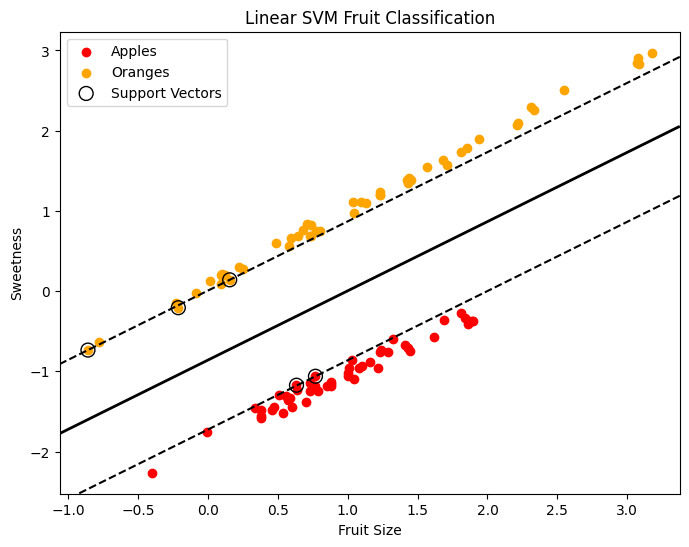

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Create dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

# Train linear SVM
model = SVC(kernel="linear")
model.fit(X, y)

# Plot
plt.figure(figsize=(8, 6))

# Scatter plot for fruits
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", label="Apples")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="orange", label="Oranges")

# Create mesh grid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Decision boundary
ax.contour(XX, YY, Z, levels=[0], colors="black", linewidths=2)

# Margins
ax.contour(XX, YY, Z, levels=[-1, 1], colors="black", linestyles="dashed")

# Support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="black",
    label="Support Vectors"
)

plt.xlabel("Fruit Size")
plt.ylabel("Sweetness")
plt.title("Linear SVM Fruit Classification")
plt.legend()
plt.show()
